mising values yang akan di handle yang menyebabkan datanya hilang
atau menggunakan data transasi di toko retail ada POS si programnya eror sehingga data yang di peroleh itu kosong
atau beberapa alasan lainya yg eror ketika pengolahan data

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('../../../PFDS_sources-master/property_data.csv')
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


csv = coma separated value
kalau dia ga pake koma harus di tambah metodenya
,delimeter = ';'
sesuaikan dengan data yang ada
default nya adalah koma

In [8]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [6]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [10]:
pd.__version__
!pip install pandas

In [11]:
pd.__version__

'1.0.0'

In [12]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [13]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

data aneh kan jadi kita harus isi mising values yang tidak kebaca missing value seperta no 7 dan 8

In [16]:
df['NUM_BEDROOMS'].unique()

array(['3', nan, '1', '2', '--', 'na'], dtype=object)

In [17]:
df['NUM_BATH'].unique()

array(['1', '1.5', nan, '2', 'HURLEY'], dtype=object)

missing valuesnya kita lihat secara manual contoh num kok ada hurley, tipe data infonya harusnya int atau float, jika ada object atau str berarti ada data yg salah

In [19]:
for baris in df['ST_NAME']:
  try:
    int(baris)
    print('Data Angka')
  except:
    print('Bukan Data Angka')

    #untuk melihat apakah disana'st_name' ada yg bukan int akan di mention


Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka
Bukan Data Angka


# kenapa DS mahal

karena harus meneliti datanay uda bener atau belom harus sec manual hmmmmm 

In [33]:
missing_values= ['n/a', 'na', '--']
#ini penting agar akurasi datanya tinggi

In [20]:
df = pd.read_csv("property_data.csv", na_values = missing_values)


In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [26]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

    #12 di atas di rubah menjadi NaN

In [25]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [27]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [29]:
df.isnull().sum()
#untuk melihan ada berapa si mising value nya

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [32]:
df.isnull().sum().sum() #mentotalkan lagi

12

In [30]:
df.isnull().values

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [False, False, False,  True, False,  True, False],
       [ True, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False,  True, False,  True, False, False, False],
       [False, False, False, False,  True, False,  True],
       [False, False, False, False,  True, False, False]])

In [31]:
df.isnull().values.any()
#akan mencari yg beda sendiri

True

ketika sudah men generalkan semua menjadi NaN yg eror dan salah ketik makan akan di isi fill nya

In [41]:
df.replace({'--':np.nan, 'na':np.nan},inplace=True)

#ganti si -- dan na menjadi nan terus di simpan itu untuk inplace

In [37]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)
df.loc[2,'ST_NUM'] = 125

In [38]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [40]:
df.loc[6,'ST_NUM'] = 125
df
#kita rubah yg kolom 6 di atas

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [43]:
df['SQ_FT'].fillna(df['SQ_FT'].median())
#kalo gada inplace=True dia ga ke save runinganya, atau bisa juga di save ke variabel lain

0    1000.0
1     950.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     950.0
8    1800.0
Name: SQ_FT, dtype: float64

In [44]:
df.head()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0


In [45]:
df['NUM_BEDROOMS'].replace({1:0})

0    3.0
1    3.0
2    3.0
3    0.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [46]:
#cara ganti tipe data misal dr int ke float

df['NUM_BEDROOMS']= df['NUM_BEDROOMS'].astype('int64')

untuk langsung menyimpan tuh bisa juga pake cara di atas langsung tulis nama variabel awalnya

df['NUM_BEDROOMS']= df['NUM_BEDROOMS'].astype('int64')
atau inplace=True

In [47]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800.0


In [49]:
df['NUM_BATH'].loc[3] = 0

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,0,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800.0


In [51]:
df['NUM_BATH'].loc[6] = 0

C:\Users\acer\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1,0,700.0
4,NaN,203.0,BERKELEY,Y,3,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2,0,950.0
7,100008000.0,213.0,TREMONT,Y,3,1,NaN
8,100009000.0,215.0,TREMONT,Y,3,2,1800.0


!

In [54]:
!pip install xlrd

In [62]:
%matplotlib inline
data= pd.ExcelFile('../../../PFDS_sources-master/obes.xls')
data

In [59]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [60]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [61]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [66]:
df = pd.read_excel('../../../PFDS_sources-master/obes.xls',sheet_name= '7.2', skiprows=4,skipfooter=14)
df

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


rubah unamed0 dan hapus missing values

In [68]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [69]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [70]:
data_age.dropna(inplace=True)

In [71]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [65]:
!pip install prettytable

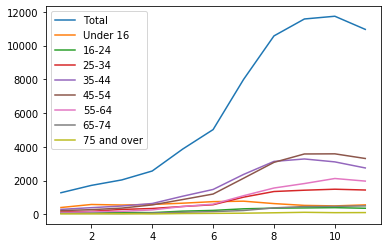

In [72]:
data_age.plot()

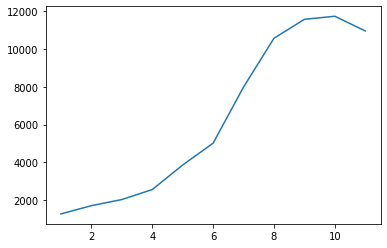

In [73]:
df['Total'].plot()

In [74]:
data_age.drop('Total', axis=1) #kolom axis 1, baris 0
data_age

#ga hilang kok kan gada inplace

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


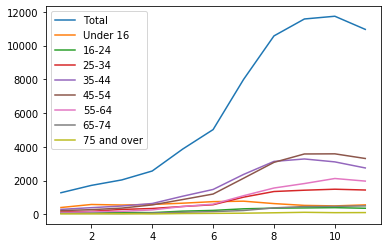

In [75]:
data_age.plot()

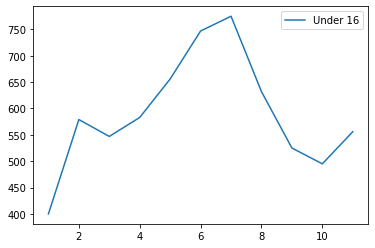

In [76]:
df['Under 16'].plot(label='Under 16', legend = True)

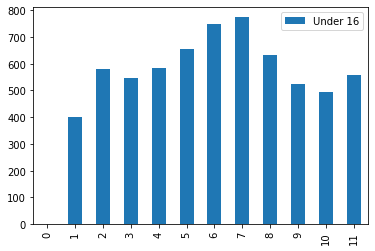

In [79]:
df['Under 16'].plot(kind='bar', label='Under 16', legend = True)

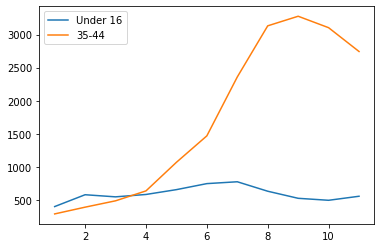

In [80]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)